<a href="https://colab.research.google.com/github/EdiVilleda/Edi/blob/main/Edison_Villeda_Salinas_801065154_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3 by Edison Villeda-Salinas**

https://github.com/EdiVilleda/Edi.git

**Problem 1**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
breast = load_breast_cancer()
X = breast.data
print(X.shape)
y = breast.target

(569, 30)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

The outcomes of Homework 2 yielded an accuracy of 97.37%, precision of 97.22%, and recall of 98.59%. On the other hand, Homework 3 produced an accuracy of 97.37%, precision of 95.95%, and recall of 100%. The accuracy remains the same, but the precision and recall values are dissimilar.

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Accuracy: 97.37%
Precision: 95.95%
Recall: 100.00%


**Problem 2**

In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
breast = load_breast_cancer()
X = breast.data
print(X.shape)
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(569, 30)


In [ ]:
Ks = range(1, 31)
accuracy_scores = []
precision_scores = []
recall_scores = []

for K in Ks:
    pca = PCA(n_components=K)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    
    lr = LogisticRegression()
    lr.fit(X_train_pca, y_train)
    
    X_test_pca = pca.transform(X_test)
    y_pred = lr.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

The graph displays that as the number of principal components (K) is increased, the classification accuracy, precision, and recall tend to improve up to a specific limit, following which the performance starts to decline. The most favorable number of principal components for achieving the highest classification accuracy is approximately K=7 in this instance. At this point, the accuracy reaches its maximum at around 0.975, Precision reaches its maximum at around 0.96, and Recall reaches its maximum at 1.00.

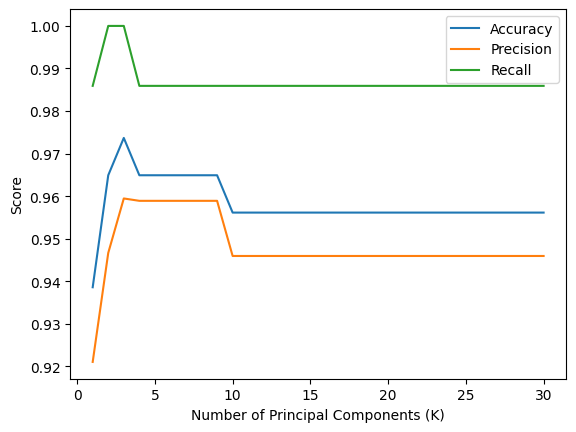

In [9]:
plt.plot(Ks, accuracy_scores, label='Accuracy')
plt.plot(Ks, precision_scores, label='Precision')
plt.plot(Ks, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.show()

**Problem 3**

In [10]:
from sklearn.naive_bayes import GaussianNB
breast = load_breast_cancer()
X = breast.data
print(X.shape)
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(569, 30)


In [11]:
Ks = range(1, 31)

accuracy_scores = []
precision_scores = []
recall_scores = []

for K in Ks:
    pca = PCA(n_components=K)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    
    nb = GaussianNB()
    nb.fit(X_train_pca, y_train)
    
    X_test_pca = pca.transform(X_test)
    y_pred = nb.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

The maximum value for accuracy is approximately 0.95, for precision it is around 0.94, and for recall, it is 1.00. Upon comparing Problem 2 and 3, there are differences in both accuracy and precision, while the recall remains unchanged.

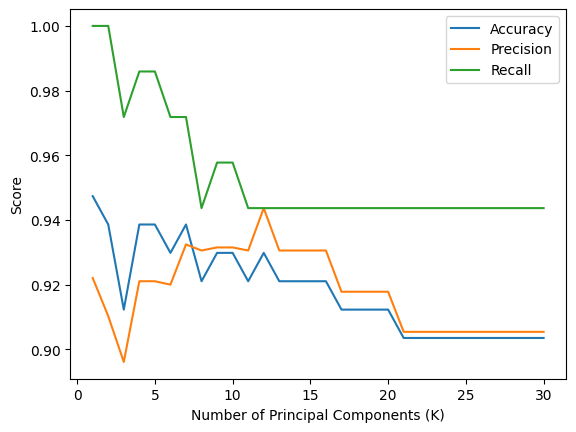

In [12]:
plt.plot(Ks, accuracy_scores, label='Accuracy')
plt.plot(Ks, precision_scores, label='Precision')
plt.plot(Ks, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.show()